In [84]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

data_dir = '/home/sohrob/Dropbox/Data/CS120/'

subjects = os.listdir(data_dir)
#subjects = [subjects[0]]

loc_subject = []
loc_all = np.array([])
for subj in subjects:
    filename = data_dir + subj + '/eml.csv'
    if os.path.exists(filename):
        #print filename
        with open(filename) as file_in:
            data = csv.reader(file_in, delimiter='\t')
            loc = np.array([])
            for data_row in data:
                if data_row:
                    loc_string = data_row[6]
                    loc_string = loc_string[1:len(loc_string)-1]
                    loc = np.append(loc, loc_string)
                    loc_all = np.append(loc_all, loc_string)
        
        loc_subject.append(np.unique(loc))



In [85]:
import pickle

loc_all_uniq = np.unique(loc_all)
freq = np.zeros(loc_all_uniq.size)
i = 0
for loc_uniq in loc_all_uniq:
    for loc_subj in loc_subject:
        if loc_uniq in loc_subj:
            freq[i] += 1
    i += 1

loc_all_uniq = loc_all_uniq[np.where(freq>1)]
freq = freq[np.where(freq>1)]

ind_sort = np.argsort(freq)
loc_all_uniq = loc_all_uniq[ind_sort]
freq = freq[ind_sort]

loc_top10 = loc_all_uniq[91:]

# saving the most frequent locations
with open('top10.dat', 'w') as file_out:
    pickle.dump(loc_top10, file_out)
file_out.close()


['"Nightlife Spot (Bar, Club)"' '"Spiritual (Church, Temple, Etc.)"'
 '"Outdoors & Recreation"'
 '"Arts & Entertainment (Theater, Music Venue, Etc.)"' '"Work"'
 '"Professional or Medical Office"' '"Another\'s Home"'
 '"Food (Restaurant, Cafe)"' '"Home"' '"Shop or Store"']


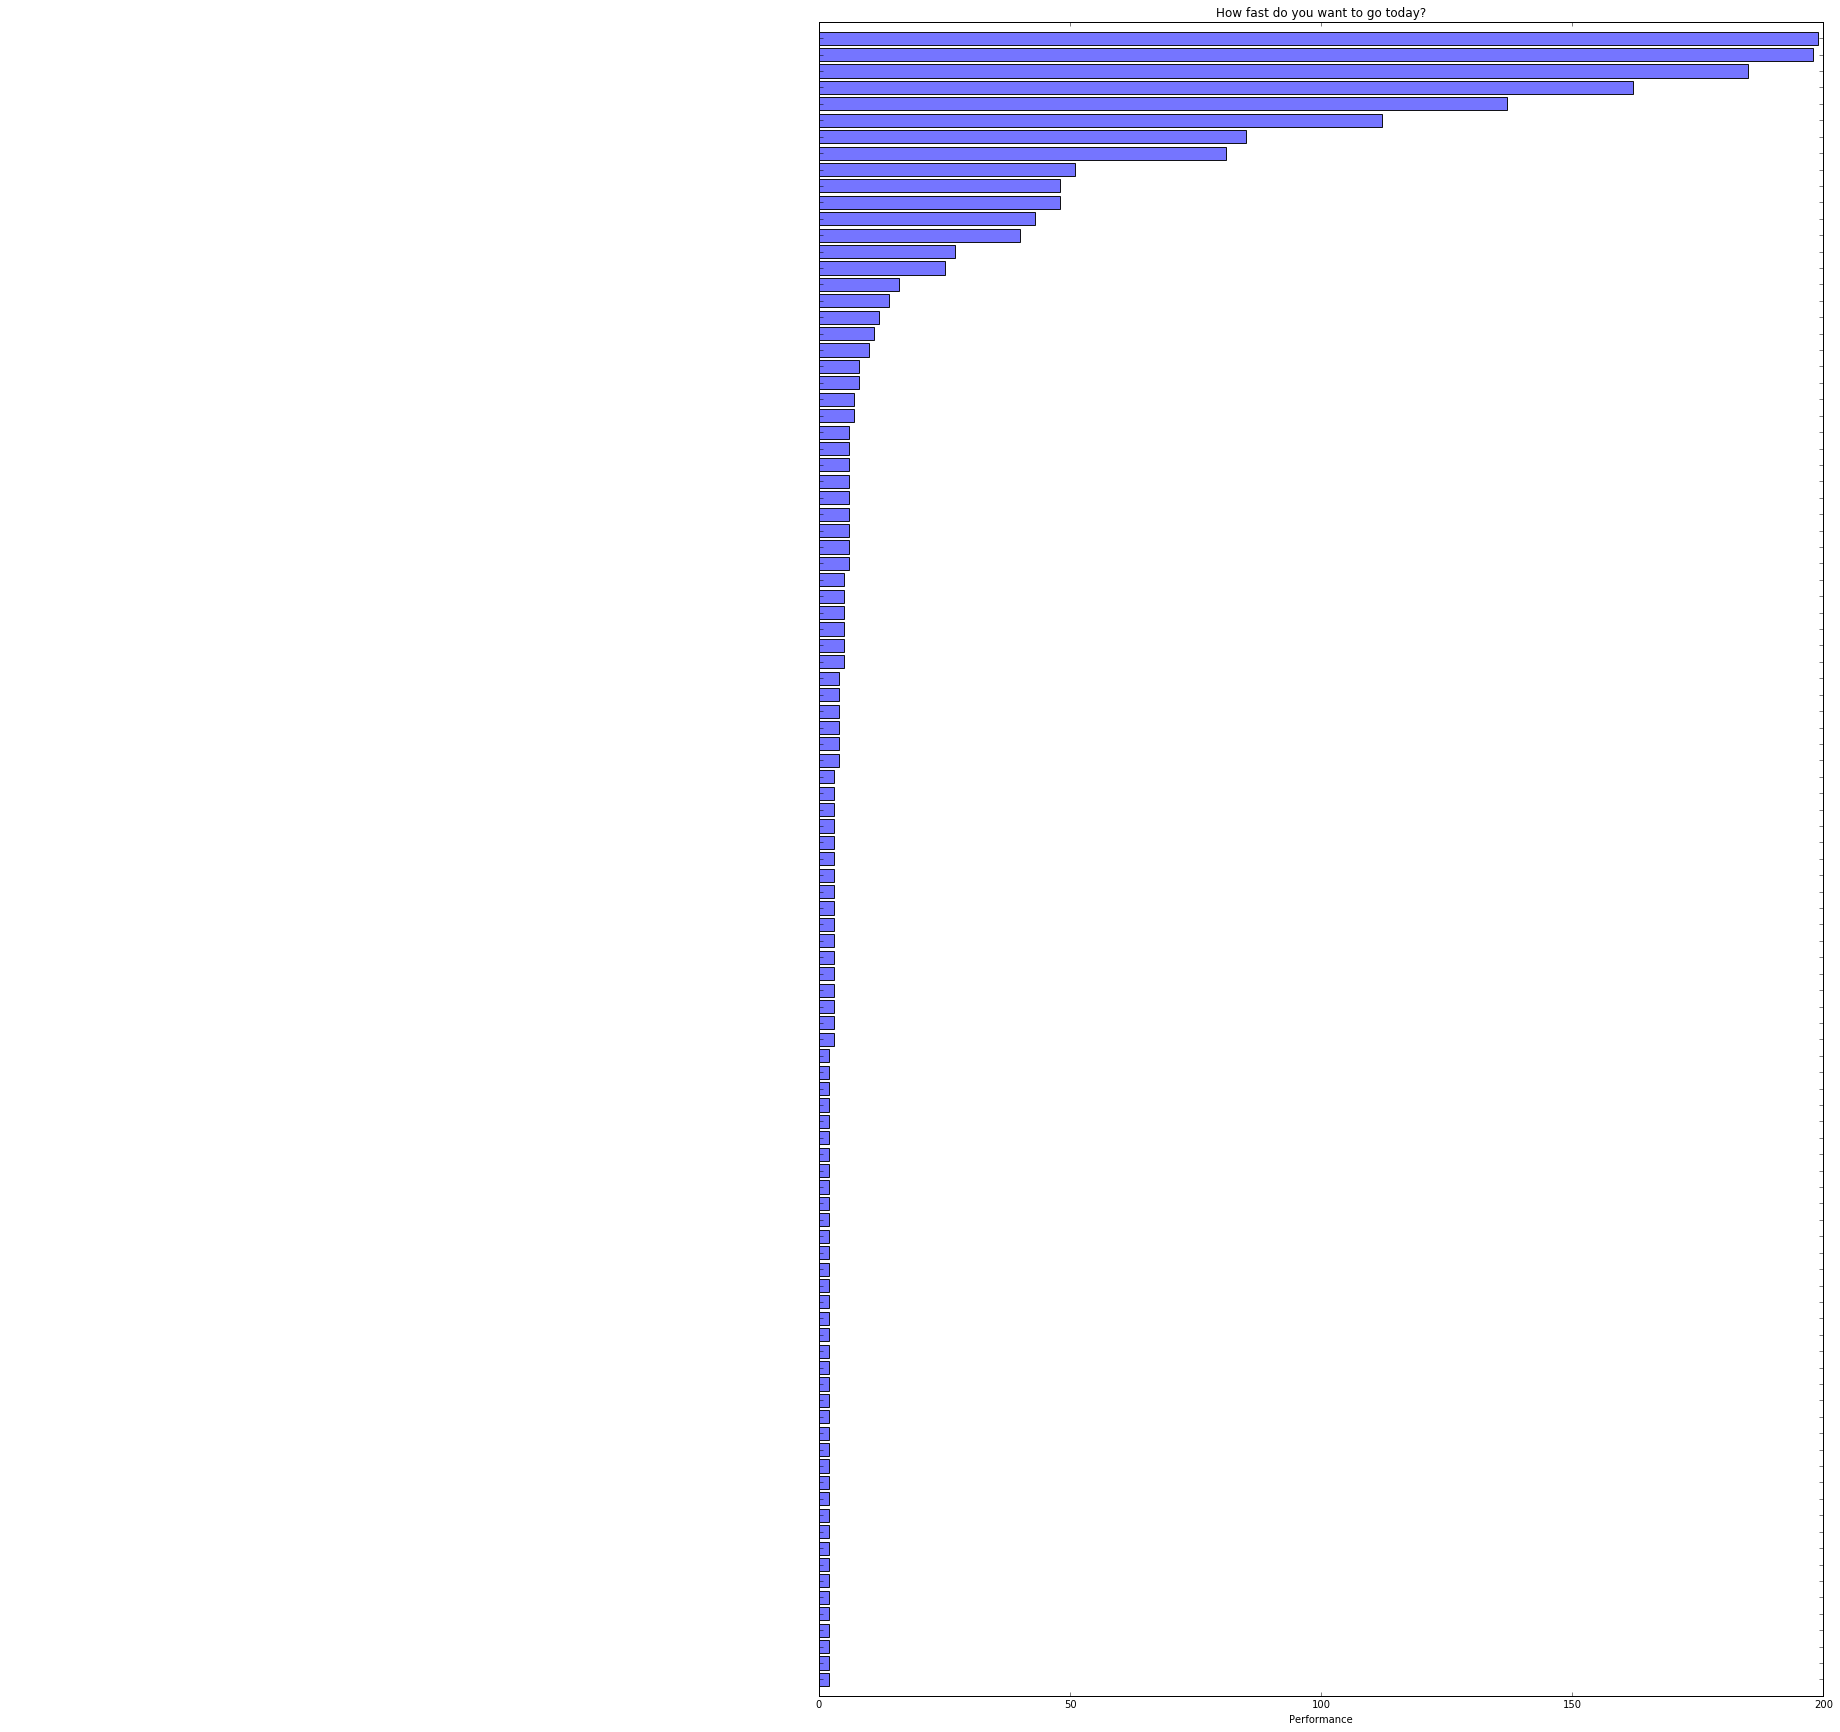

In [99]:
plt.figure(figsize=(18,30))
#print freq[92:]
show_from = 0
plt.barh(range(len(loc_all_uniq)-show_from), freq[show_from:], align='center', color=(.4,.4,1), alpha=0.9)
#plt.yticks(y_pos, people)
plt.xlabel('Performance')
plt.title('How fast do you want to go today?')
axes = plt.gca()
axes.set_ylim([-1, len(loc_all_uniq)-show_from])
plt.yticks(range(len(loc_all_uniq)-show_from), loc_all_uniq[show_from:], fontsize=15, color=(1,1,1));
print loc_all_uniq[91:]
